<a href="https://colab.research.google.com/github/ParthikB/Neural-Networks-from-Scratch-2/blob/master/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np


##############################################

def create_data():
  height = [130, 140, 135, 125, 120]
  weight = [35 ,  30,  30,  35,  35]
  y      = [  0,   1,   0,   1,   1]    
  BMI    = ["Healthy", "Unhealthy", "Healthy", "Unhealthy", "Unhealthy"]

  return np.array([height, weight]), np.array(y).reshape(1, -1)


def normalize(X):
    m = X.shape[1]
    mu = np.mean(X)
    sigma = np.sum(X**2) / m
    
    return (X-mu)/sigma
  

def sigmoid(z):
  A =  1 / (1 + np.exp(-z))
  cache = z
  return A, cache


def sigmoid_derivative(dA, cache):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ


def initialize_random_parameters(layer_dims, X):
    parameters = {}
    parameters["W1"] = np.random.randn(layer_dims[0], X.shape[0]) * 0.01
    parameters["b1"] = np.zeros((layer_dims[0], 1))
    for i in range(1, len(layer_dims)):
        parameters["W" + str(i+1)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.01
        parameters["b" + str(i+1)] = np.zeros((layer_dims[i], 1))

    return parameters

In [0]:

Name	Weight (minus 135)	Height (minus 66)	Gender
Alice	-2	-1	1
Bob	25	6	0
Charlie	17	4	0
Diana	-15	-6	1

### Basic Neuron Working

In [4]:
# Defining main Class.
class Neuron:
  
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias   = bias
    
    
  def feedforward(self, X):
    # Weights inputs, add bias and then use activation function
    math_e_magic = np.dot(self.weights, X) + self.bias
    output = sigmoid(math_e_magic)
    
    return output
    
    
# Testing
X = [2, 3]
weights, bias = [2, 3], [4]

# > Defining the Class
neuron = Neuron(weights, bias)

# > Feedforwarding
print(neuron.feedforward(X))
# Result --> array([0.99999996])

[0.99999996]


### Neural Network Class

In [0]:
class NeuralNetwork:
  '''
      A Neural Network with:
        - 2 inputs
        - a hidden layer with 2 Neurons
        - an output layer with 1 Neuron
        
  '''    
    
#   def feedforward(self, X, parameters):
#     W1, b1, W2, b2 = parameters
    
#     z1 = np.dot(W1, X) + b1
#     a1 = sigmoid(z1)
    
#     z2 = np.dot(W2, a1) + b2
#     a2 = sigmoid(z2)
    
#     y_hat = a2
#     return y_hat


  def feedforward(self, X, parameters):

    def linear_forward(A, W, b):
      Z = np.dot(W, A) + b
      linear_cache = (A, W, b)

      A, activation_cache = sigmoid(Z)

      cache = (linear_cache, activation_cache)
      return A, cache

    caches = []
    A = X
    L = len(parameters) // 2
    
    for i in range(1, L+1):
      A, cache = linear_forward(A, parameters["W"+str(i)], parameters["b"+str(i)])
      caches.append(cache)

    return A, caches

  
  def cost(self, yhat, y):
    m = y.shape[1]
    cost = -np.sum(y * np.log(yhat) + (1-y) * np.log(1-yhat)) / m
    return cost
  
  
  def backward_propagation(self, yhat, y, caches):

    def linear_backward(dA, cache):
      linear_cache, activation_cache = cache
      A, W, b = linear_cache

      dZ = sigmoid_derivative(dA, activation_cache)  
      A_prev = A
      m = A_prev.shape[1]

      dW = np.dot(dZ, A_prev.T) / m
      db = np.sum(dZ, axis=1, keepdims=True) / m
      dA_prev = np.dot(W.T, dZ)

      return dA_prev, dW, db


    L = len(caches)
    grads = {}
    y = y.reshape(yhat.shape)
    dyhat = -(np.divide(y, yhat) - np.divide(1-y, 1-yhat))
    grads["dA" + str(L)] = dyhat
    
    for l in range(L)[::-1]:
        current_cache = caches[l]
        grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_backward(grads["dA" + str(l+1)], current_cache)

    return grads
  
  
  def gradient_descent(self, parameters, grads, learning_rate=0.01):
    L = parameters.__len__() // 2
    
    for l in range(1, L+1):
      parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
      parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    return parameters

[1 1 1 1 1]


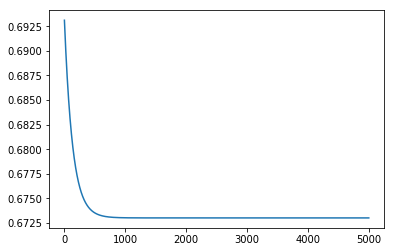

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

X, y = create_data()
X = normalize(X)
layer_dims = [2, 1]
parameters = initialize_random_parameters(layer_dims, X)

cost_log, epoch_log = [], []
EPOCHS = 5000

nn = NeuralNetwork()

for epoch in range(EPOCHS):
  yhat, caches = nn.feedforward(X, parameters)
  cost = nn.cost(yhat, y)
  cost_log.append(cost)
  epoch_log.append(epoch+1)
  
  grads = nn.backward_propagation(yhat, y, caches)
  parameters = nn.gradient_descent(parameters, grads)
  
print(np.where(yhat[0] > 0.5, 1, 0))

plt.plot(epoch_log, cost_log)